# 1. Linear Support Vector Machine
The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear Support vector machine works on the data set for varying values of C (similar to the regularization term in linear/logistic regression). Let's load the data.

In [43]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
%matplotlib inline

raw_data = loadmat('ex6data1.mat')

We'll visualize it as a scatter plot where the class label is denoted by a symbol ('+' for positive, 'o' for negative).

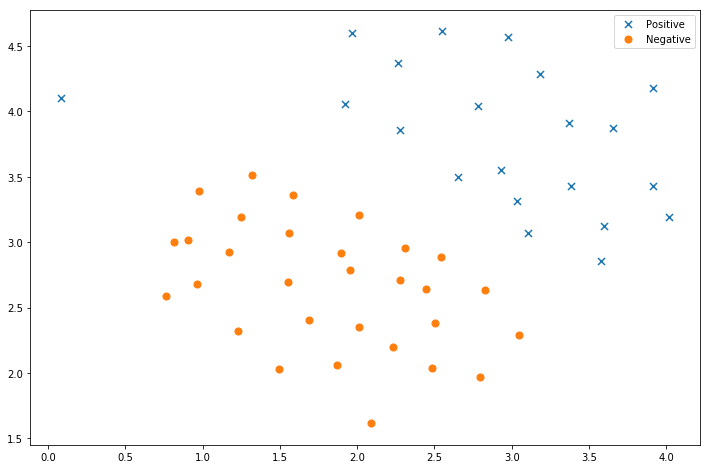

In [44]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend()  

Notice that there is one outlier positive example that sits apart from the others. The classes are still linearly separable but it's a very tight fit. We're going to train a linear support vector machine to learn the class boundary. Use scikit-learn LinearSVC to linearly classify the dataset. Use regularized SVM, although we have not yet studied regularized svm. In svm the regularization is controled by the parameter C. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$ , where $\lambda$ is the regularization parameter that we were using previously for logistic regression. Classify the training examples with C=1 and C=100. Plot the decision boundary (or the confidence level (distance from boundary)). Explain what you observe.

In [45]:
from sklearn import svm 
#TODO: use LinearSVC to linearly classify
# use loss='hinge', max_iter=1000, and C=[1,100] in call to LinearSCV
clf = svm.LinearSVC(loss='hinge', max_iter=1000, C=1.0 )
X = data[['X1', 'X2']]
clf.fit(raw_data['X'], data['y'])

print(clf.score(data[['X1', 'X2']], data['y']))

0.9803921568627451


D:\IntalledWindowsApp\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# 2 Non-linear Support Vector Machine

Now we're going to move from a linear SVM to one that's capable of non-linear classification. Lets visualize the data first.

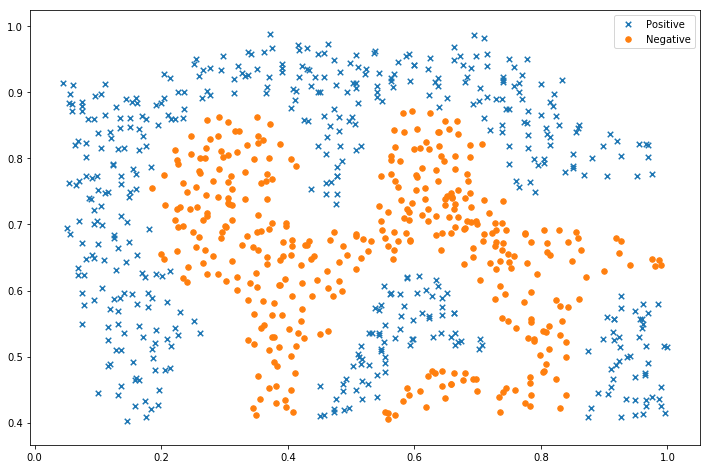

In [46]:
raw_data = loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')  
ax.legend()  


For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data. To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label. We'll see from the result that it gets most of them right. There are two hyperparamters C and gamma. In the next part of the lab you are required to find the optimal hyperparamters based on the validation set performance.

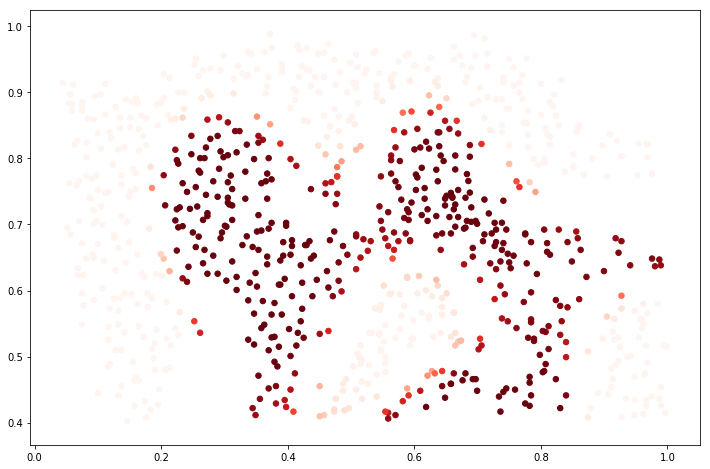

In [47]:
svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]
svc.score(data[['X1', 'X2']], data['y'])

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')  

Find the optimal hyperparameters C and gamma, for the validation dataset [Xval, yval], by trying out various values of the parameters (grid-search). The optimal parameters are those that give the max svc.score

In [56]:
raw_data = loadmat('ex6data3.mat')

X = raw_data['X']  
Xval = raw_data['Xval']  
y = raw_data['y'].ravel()  
yval = raw_data['yval'].ravel()

# svc = svm.SVC(C=100, gamma=10, probability=True)  
# svc.fit(X, y)
# score_val = svc.score(Xval, yval)

# print(score_val)

#TODO find optimal hyperparatmers 

gammas = [0.1, 1, 5, 10, 50, 100, 500, 1000]
cs = [0.1, 1, 5, 10, 50, 100, 500, 1000]

optimal_score = 0
optimal_c = 0
optimal_gamma = 0
for c in cs:
    for gamma in gammas:
        svc = svm.SVC(C=c, gamma=gamma, probability=True)  
        svc.fit(X, y)
        score_val = svc.score(Xval, yval)
        if score_val > optimal_score:
            optimal_score = score_val
            optimal_c = c
            optimal_gamma = gamma

print("Best Score: ",optimal_score)
print("Best c: ", optimal_c)
print("Best gamma: ",optimal_gamma)

Best Score:  0.965
Best c:  1
Best gamma:  50


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[1, 1000], 'gamma':[1, 1000]}
grid_search = GridSearchCV(estimator=svm.SVC(), param_grid = param_grid)
grid_search.fit(X, y)
print("Evaluation score: ", grid_search.score(Xval, yval))
print("Best parameters: ", grid_search.best_params_)
print("Best scores: ", grid_search.best_score_ )


Evaluation score:  0.95
Best parameters:  {'C': 1000, 'gamma': 1}
Best scores:  0.8578199052132701


D:\IntalledWindowsApp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\IntalledWindowsApp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
